In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.drop('Id', axis=1,inplace=True)

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
dummies = pd.get_dummies(df['Species'], prefix='Species')

In [ ]:
dummies

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
df=pd.concat([df,dummies], axis=1)

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [ ]:
df.rename(columns={'Species_Iris-setosa':'Species_setosa'}, inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-versicolor':'Species_versicolor'}, inplace=True)

In [ ]:
df.rename(columns={'Species_Iris-virginica':'Species_virginica'}, inplace=True)

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_setosa', 'Species_versicolor', 'Species_virginica'],
      dtype='object')

In [ ]:
correlacion=df.corr()

<ipython-input-48-8bb0f04df072>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr()


In [ ]:
alta_corr=np.where((correlacion>0.95)&(correlacion<1))

In [ ]:
alta_corr

(array([2, 3]), array([3, 2]))

In [ ]:
baja_corr=np.where((correlacion<-0.95)&(correlacion>-1))

In [ ]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df.drop('Species', axis=1,inplace=True)

In [ ]:
df_estandar= scaler.fit_transform(df)

In [ ]:
df_estandar

In [ ]:
df_estandar=pd.DataFrame(df_estandar,columns=df.columns)

In [ ]:
df_estandar

In [ ]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba=train_test_split(df_estandar,test_size=0.20,random_state=42)

In [ ]:
entrenamiento

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
22,-1.506521,1.263460,-1.568735,-1.312977,1.414214,-0.707107,-0.707107
15,-0.173674,3.114684,-1.284407,-1.050031,1.414214,-0.707107,-0.707107
65,1.038005,0.106445,0.364699,0.264699,-0.707107,1.414214,-0.707107
11,-1.264185,0.800654,-1.227541,-1.312977,1.414214,-0.707107,-0.707107
42,-1.748856,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...
71,0.310998,-0.587764,0.137236,0.133226,-0.707107,1.414214,-0.707107
106,-1.143017,-1.281972,0.421564,0.659118,-0.707107,-0.707107,1.414214
14,-0.052506,2.189072,-1.455004,-1.312977,1.414214,-0.707107,-0.707107
92,-0.052506,-1.050569,0.137236,0.001753,-0.707107,1.414214,-0.707107


In [ ]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'SepalLengthCm~SepalWidthCm+PetalLengthCm+PetalWidthCm+Species_setosa+Species_versicolor', data=entrenamiento)
modelo=modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     145.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):           8.28e-48
Time:                        23:25:03   Log-Likelihood:                -49.544
No. Observations:                 120   AIC:                             111.1
Df Residuals:                     114   BIC:                             127.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0227      0

In [ ]:
y_aprox = 0 + 0.2734*prueba['SepalWidthCm'] +  1.8574*prueba['PetalLengthCm']- 0.4296*prueba['PetalWidthCm'] +  0.5348*prueba ['Species_setosa'] + 0.1642*prueba['Species_versicolor']

In [ ]:
y_aprox

In [ ]:
tabla = pd.DataFrame({'Real':prueba['SepalLengthCm'], 'Prediccion':y_aprox, 'Errores':prueba['SepalLengthCm']-y_aprox})

In [ ]:
tabla

Text(0, 0.5, 'Prediccion')

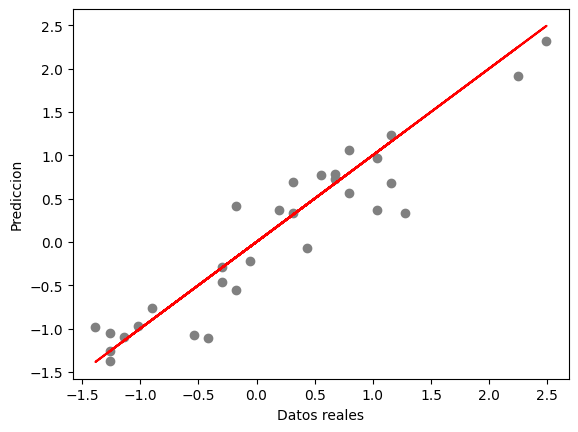

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(prueba['SepalLengthCm'],y_aprox,color='gray')
plt.plot(prueba['SepalLengthCm'],prueba['SepalLengthCm'],color='red')
plt.xlabel('Datos reales')
plt.ylabel('Prediccion')

In [ ]:
l_residuos=len(tabla['Errores'])

Text(0, 0.5, 'Valor del residuo')

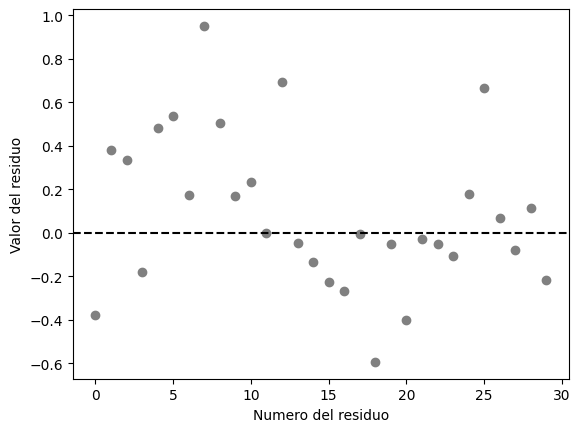

In [ ]:
plt.scatter(range(l_residuos),tabla['Errores'],color='grey')
plt.axhline(y=0,linestyle='--',color='black')
plt.xlabel('Numero del residuo')
plt.ylabel('Valor del residuo')

Text(0, 0.5, 'Frecuencia (proba)')

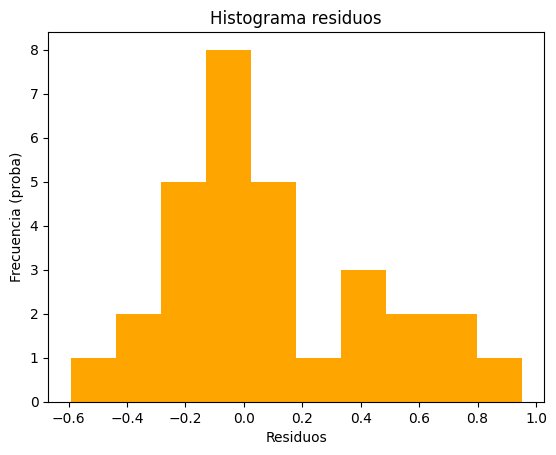

In [ ]:
plt.hist(x=tabla['Errores'], color='orange')
plt.title('Histograma residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia (proba)')

In [ ]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
Errores_est = (tabla['Errores']-media)/std

In [ ]:
from scipy import stats
stats.kstest(Errores_est, 'norm')

KstestResult(statistic=0.13356277658503513, pvalue=0.6109465790693169, statistic_location=-0.2539410334125673, statistic_sign=1)

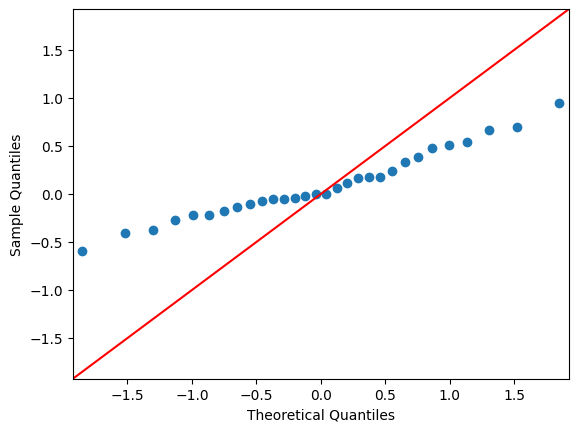

In [ ]:
import statsmodels.api as sm
from scipy import stats
QQ = sm.qqplot(tabla['Errores'], stats.norm, line='45')